<a href="https://colab.research.google.com/github/wizardcalidad/linear_regression/blob/main/LinearRegressionNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV, LassoCV, ElasticNet
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df['sales'].shape

(200,)

In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

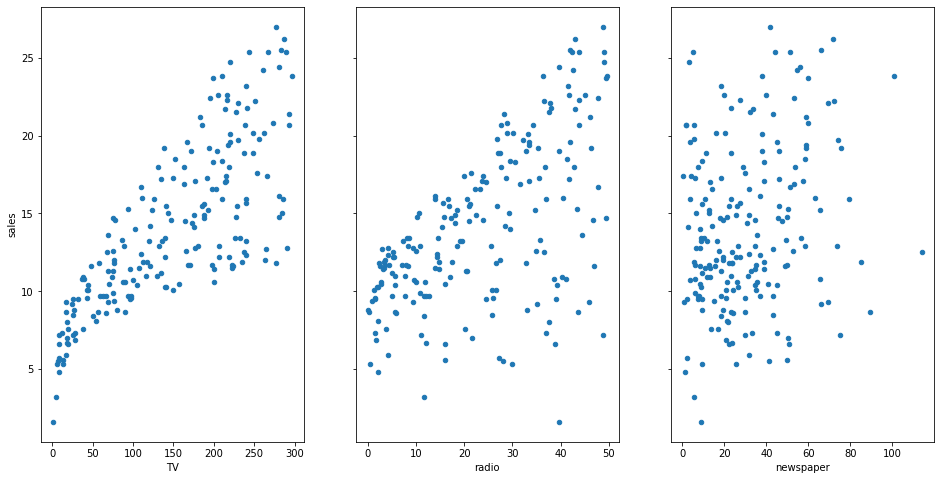

In [10]:
fig, axs = plt.subplots(1,3, sharey=True)

df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

R-squared is used to check how fit our data is in the model, however, it represents the explainabilty of the data to the model. How much is the data being explained to the model.

It increases with increase in number of features or independent variables. To avoid this problem, adjusted R-sqaured will be used instead because it penalizes excessive use of such features which do not correlate with the output data.

In [11]:
tv = ['TV']

In [12]:
X = df[tv]
y = df.sales

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

printing intercept and coefficients

In [19]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


prediction using the model

In [21]:
X_new = pd.DataFrame({'TV':[50]})

In [22]:
X_new

,TV
0,50


In [23]:
lm.predict(X_new)

array([9.40942557])

plotting least squares line

In [24]:
X_new = pd.DataFrame({'TV':[df.TV.min(), df.TV.max()]})

In [25]:
X_new

,TV
0,0.7
1,296.4


In [26]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

plotting the observed data and plot the least square line

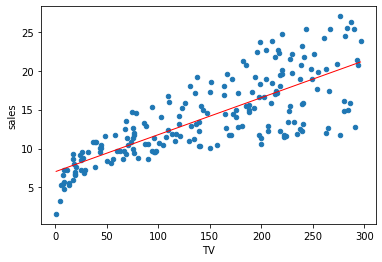

In [28]:
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=1)

In [31]:
lm = smf.ols(formula='sales ~ TV', data=df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


If we are going to check it on multiple dataset in case of multiple linear regression

*Multiple Linear Regression*

In [33]:
feature_cols = ['TV', 'radio', 'newspaper']

X = df[feature_cols]
y = df.sales

In [34]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [36]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        19:07:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Feature Selection**

Try different models, and only keep predictors in the model if they have small p-values.

Check if the R-squared value goes up when you add new predictors to the model.

In [37]:
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm.rsquared

0.8971942610828956

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use adjusted R-squared which penalises the model complexity (to control overfitting), but this again generally

a better approach to feature selection is cross-validation. It provides a more reliable way to choose which of the created models will best generalise as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

